In [219]:
pip install requests beautifulsoup4 


Note: you may need to restart the kernel to use updated packages.


In [220]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
url = "https://www.bestcolleges.com/research/average-sat-score-full-statistics/#demographics"


In [222]:
response = requests.get(url)


In [223]:
if response.status_code == 200:
    print("Todo bien")
    soup = BeautifulSoup(response.content,"html.parser")

Todo bien


In [224]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <title>
   All About SAT Scores: National Average and Full Statistics | BestColleges
  </title>
  <script type="application/ld+json">
   {
  "@context": "https://schema.org",
  "@type": "FAQPage",
  "mainEntity": [{
    "@type": "Question",
    "name": "How many times can you take the SAT?",
    "acceptedAnswer": {
      "@type": "Answer",
      "text": "There is no limit to the number of times you can take the SAT. The organization that administers the SAT, College Board, recommends that students take the test at least twice because many schools \"superscore\" your results. That means they combine your highest math score with your highest ERW score even if they are from different tests. It's common for students to take the SAT in the spring of their junior year and another time in the fall of their senior year."
    }
  },{
    "@type": "Question",
    "name": "W

In [225]:
for i in soup.find_all("table"):
    print(i.get_text())

National Average SAT Score Over Past Six Years, 2018-2023Graduating ClassAverage ERW ScoreAverage Math ScoreAverage Total Score201953152810592020528523105120215335281060202252952110502023520508102820245195051024
State⇅Average ERW Score⇅Average Math Score⇅Average Total Score⇅Alabama5915661157Alaska5555241079Arizona5995861185Arkansas6125751188California5495371086Colorado510488998Connecticut502488990Delaware484464948District of Columbia480457937Florida493455948
SAT Scores for Ivy League SchoolsSchoolSAT Score (25th-75th Percentile)Harvard University1480-1580Yale University1480-1580University of Pennsylvania1480-1570Columbia University1470-1570Dartmouth University1470-1570Brown University1460-1570Princeton University1460-1570Cornell University1450-1560
SAT Scores for Other Popular SchoolsSchoolSAT Score (25th-75th Percentile)University of Chicago1510-1580Vanderbilt University1480-1570Stanford University1470-1570Duke University1468-1558Northwestern University1460-1560New York University1450

In [226]:
# buscar las tablas
tables = soup.find_all("table")
tables


[<table class="sonic-table shadow-md"><caption>National Average SAT Score Over Past Six Years, 2018-2023</caption><thead><tr><th scope="col">Graduating Class</th><th scope="col">Average ERW Score</th><th scope="col">Average Math Score</th><th scope="col">Average Total Score</th></tr></thead><tbody><tr><th data-title="Graduating Class" scope="row">2019</th><td data-title="Average ERW Score">531</td><td data-title="Average Math Score">528</td><td data-title="Average Total Score">1059</td></tr><tr><th data-title="Graduating Class" scope="row">2020</th><td data-title="Average ERW Score">528</td><td data-title="Average Math Score">523</td><td data-title="Average Total Score">1051</td></tr><tr><th data-title="Graduating Class" scope="row">2021</th><td data-title="Average ERW Score">533</td><td data-title="Average Math Score">528</td><td data-title="Average Total Score">1060</td></tr><tr><th data-title="Graduating Class" scope="row">2022</th><td data-title="Average ERW Score">529</td><td data

### 1. Average SAT Score Over Past Six Years, 2018-2023

In [227]:
table = soup.find("table", class_="sonic-table shadow-md")


In [228]:
headers = [th.get_text() for th in table.find_all("th")[:4]]
# Extraemos las filas de la tabla correctamente
rows = []
for row in table.find_all("tr")[1:]:  # Ignoramos la primera fila de encabezados
    cols = row.find_all("td")
    # Verificamos si la fila tiene las celdas correspondientes (4 celdas por fila)
    if len(cols) == 3:  # Solo hay 4 celdas de datos por fila (años + 3 columnas de puntajes)
        year = row.find("th").get_text()  # Obtener el año de la columna <th> de cada fila
        cols = [year] + [i.get_text() for i in cols]  # Agregar la etnia como primera columna
        rows.append(cols)

In [229]:
headers

['Graduating Class',
 'Average ERW Score',
 'Average Math Score',
 'Average Total Score']

In [230]:
rows

[['2019', '531', '528', '1059'],
 ['2020', '528', '523', '1051'],
 ['2021', '533', '528', '1060'],
 ['2022', '529', '521', '1050'],
 ['2023', '520', '508', '1028'],
 ['2024', '519', '505', '1024']]

In [231]:
df_años = pd.DataFrame(rows, columns = headers)

In [232]:
df_años

,Graduating Class,Average ERW Score,Average Math Score,Average Total Score
0,2019,531,528,1059
1,2020,528,523,1051
2,2021,533,528,1060
3,2022,529,521,1050
4,2023,520,508,1028
5,2024,519,505,1024


In [233]:
df_años["Average ERW Score"]= df_años["Average ERW Score"].astype(int)
df_años["Average Math Score"]= df_años["Average Math Score"].astype(int)

/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_12332/65790723.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_años, x="Graduating Class", y="Average ERW Score", label = "ERW", ci=None, marker="o", color="blue")
/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_12332/65790723.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_años, x="Graduating Class", y="Average Math Score", label = "Math", ci=None, marker="o", color="orange")


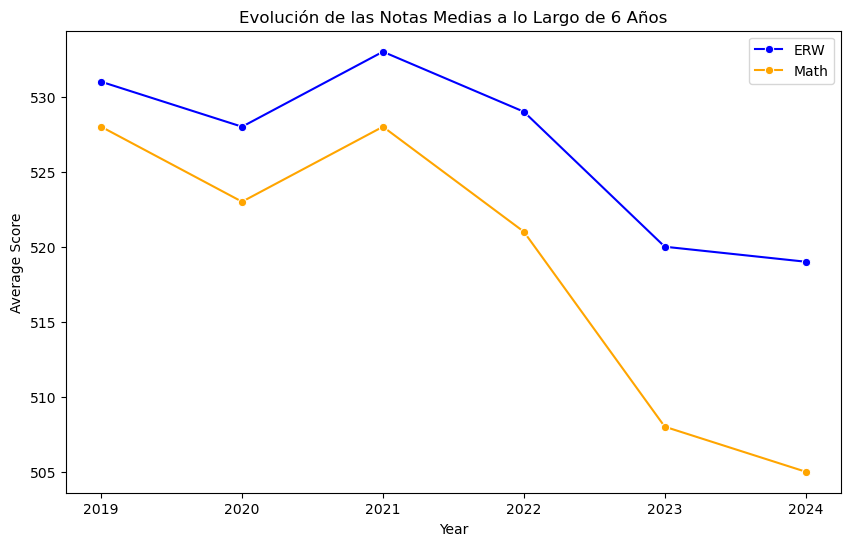

In [234]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_años, x="Graduating Class", y="Average ERW Score", label = "ERW", ci=None, marker="o", color="blue")
sns.lineplot(data=df_años, x="Graduating Class", y="Average Math Score", label = "Math", ci=None, marker="o", color="orange")

plt.title("Evolución de las Notas Medias a lo Largo de 6 Años")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.show()

### 2. Average SAT Scores by Race/Ethnicity, 2023

In [235]:
table2 = tables[4]
table2

<table class="sonic-table shadow-md"><caption>Table: Average SAT Scores by Race/Ethnicity, 2023</caption><thead><tr><th scope="col">Race/Ethnicity</th><th scope="col">Percentage of Test-Takers</th><th scope="col">SAT ERW Average Score</th><th scope="col">SAT Math Average Score</th><th scope="col">Total Average SAT Score</th></tr></thead><tbody><tr><th data-title="Race/Ethnicity" scope="row">American Indian/Alaska Native</th><td data-title="Percentage of Test-Takers">1%</td><td data-title="SAT ERW Average Score">449</td><td data-title="SAT Math Average Score">432</td><td data-title="Total Average SAT Score">881</td></tr><tr><th data-title="Race/Ethnicity" scope="row">Asian</th><td data-title="Percentage of Test-Takers">10%</td><td data-title="SAT ERW Average Score">599</td><td data-title="SAT Math Average Score">629</td><td data-title="Total Average SAT Score">1228</td></tr><tr><th data-title="Race/Ethnicity" scope="row">Black/African American</th><td data-title="Percentage of Test-Take

In [236]:

# Extraemos los encabezados de la tabla
headers = [th.get_text() for th in table2.find_all("th")[:5]]
# Extraemos las filas de la tabla correctamente
rows = []
for row in table2.find_all("tr")[1:]:  # Ignoramos la primera fila de encabezados
    cols = row.find_all("td")
    # Verificamos si la fila tiene las celdas correspondientes (5 celdas por fila)
    if len(cols) == 4:  # Solo hay 5 celdas de datos por fila (etnia + 4 columnas de puntajes)
        ethnicity = row.find("th").get_text()  # Obtener la etnia de la columna <th> de cada fila
        cols = [ethnicity] + [ele.get_text() for ele in cols]  # Agregar la etnia como primera columna
        rows.append(cols)

In [237]:
headers

['Race/Ethnicity',
 'Percentage of Test-Takers',
 'SAT ERW Average Score',
 'SAT Math Average Score',
 'Total Average SAT Score']

In [238]:
rows

[['American Indian/Alaska Native', '1%', '449', '432', '881'],
 ['Asian', '10%', '599', '629', '1228'],
 ['Black/African American', '12%', '467', '440', '907'],
 ['Hispanic/Latino/a', '25%', '481', '458', '939'],
 ['Native Hawaiian/ Other Pacific Islander', '0%', '475', '452', '926'],
 ['White', '37%', '551', '532', '1083'],
 ['Two or More Races', '4%', '556', '534', '1090'],
 ['No Response', '12%', '477', '471', '949']]

In [239]:
df_etnias = pd.DataFrame(rows, columns = headers)

In [240]:
df_etnias

,Race/Ethnicity,Percentage of Test-Takers,SAT ERW Average Score,SAT Math Average Score,Total Average SAT Score
0,American Indian/Alaska Native,1%,449,432,881
1,Asian,10%,599,629,1228
2,Black/African American,12%,467,440,907
3,Hispanic/Latino/a,25%,481,458,939
4,Native Hawaiian/ Other Pacific Islander,0%,475,452,926
5,White,37%,551,532,1083
6,Two or More Races,4%,556,534,1090
7,No Response,12%,477,471,949


In [241]:
df_etnias.drop(7, inplace=True, axis=0)

In [242]:
# convierto de object a integer
df_etnias["SAT ERW Average Score"]= df_etnias["SAT ERW Average Score"].astype(int)
df_etnias["SAT Math Average Score"]= df_etnias["SAT Math Average Score"].astype(int)
df_etnias["Total Average SAT Score"]= df_etnias["Total Average SAT Score"].astype(int)



In [243]:
orderetn= df_etnias.groupby("Race/Ethnicity")["SAT Math Average Score"].mean().sort_values(ascending=False).index

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

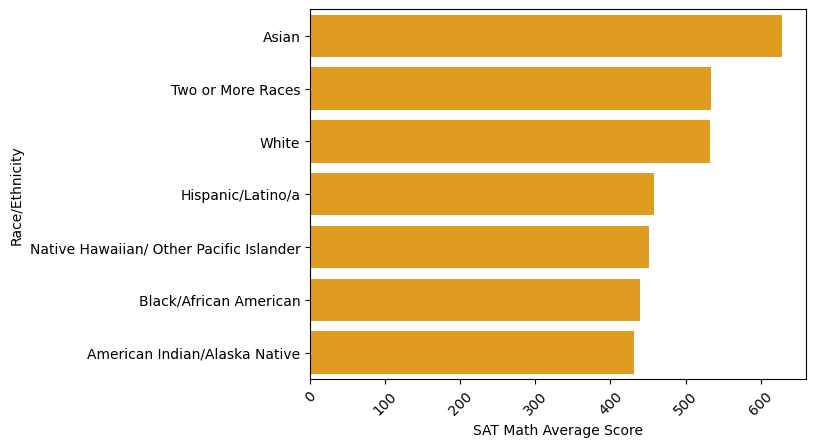

In [244]:
sns.barplot(data= df_etnias, x="SAT Math Average Score", y="Race/Ethnicity", order = orderetn, color="orange")
plt.xticks(rotation=45)


(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

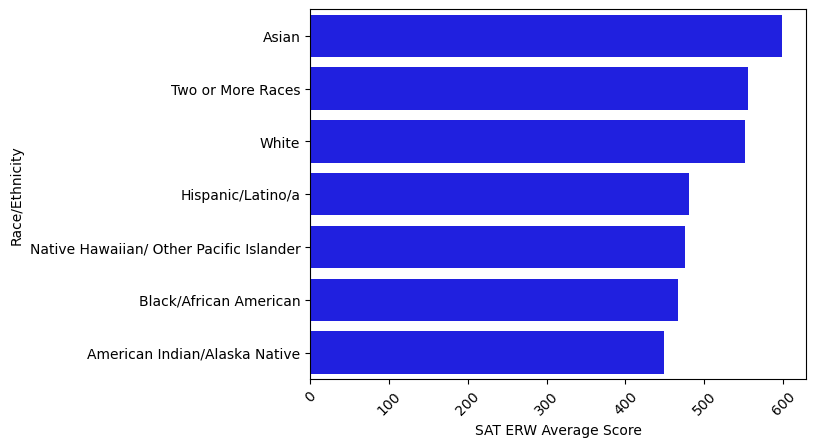

In [245]:
sns.barplot(data= df_etnias, x="SAT ERW Average Score", y="Race/Ethnicity", order = orderetn, color= "blue")
plt.xticks(rotation=45)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400')])

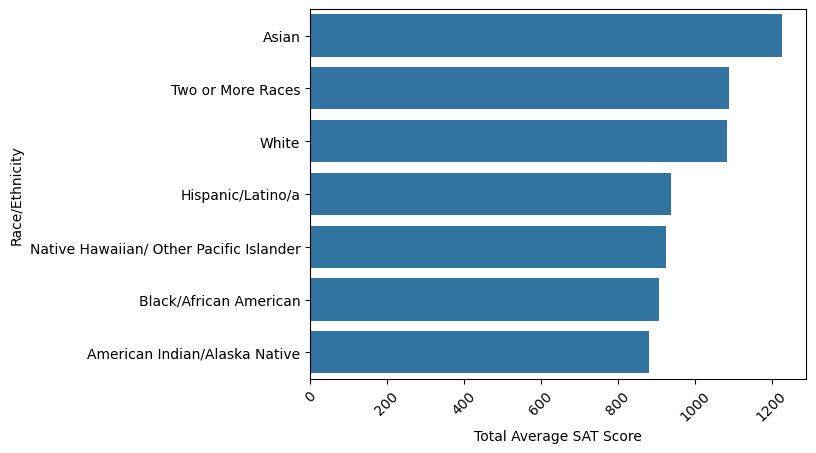

In [246]:
sns.barplot(data= df_etnias, x="Total Average SAT Score", y="Race/Ethnicity", order= orderetn)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Asian'),
  Text(1, 0, 'Two or More Races'),
  Text(2, 0, 'White'),
  Text(3, 0, 'Hispanic/Latino/a'),
  Text(4, 0, 'Native Hawaiian/ Other Pacific Islander'),
  Text(5, 0, 'Black/African American'),
  Text(6, 0, 'American Indian/Alaska Native')])

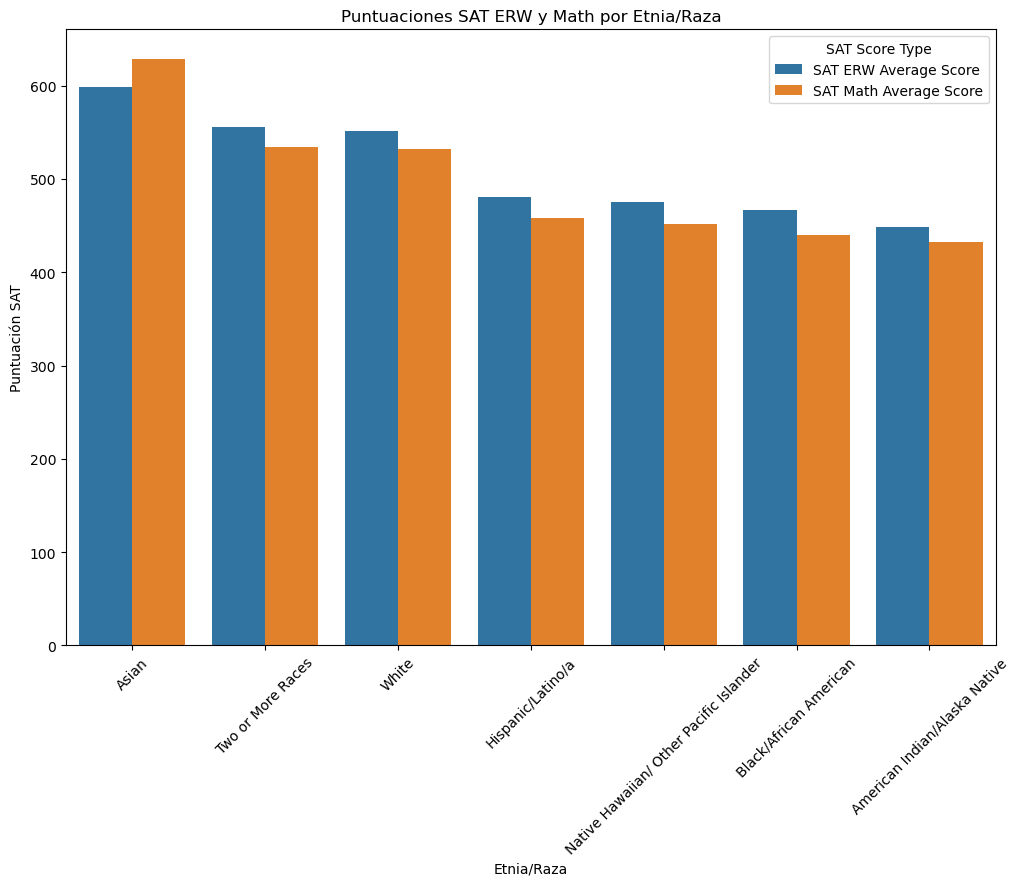

In [247]:
# Reestructuramos el DataFrame para que tenga una columna 'SAT Score Type' (tipo de puntuación)
df_melted = pd.melt(df_etnias, id_vars=["Race/Ethnicity"], value_vars=["SAT ERW Average Score", "SAT Math Average Score"],
                    var_name="SAT Score Type", value_name="Score")

plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x="Race/Ethnicity", y="Score", hue="SAT Score Type", order = orderetn)
plt.title("Puntuaciones SAT ERW y Math por Etnia/Raza")
plt.xlabel("Etnia/Raza")
plt.ylabel("Puntuación SAT")
plt.xticks(rotation=45)

### 3. Average Math Section Score by Gender Over Time, 2017-2024

In [248]:
table3= tables[8]
table3.get_text()
table3

<table class="sonic-table shadow-md"><caption>Average Math Section Score by Gender Over Time, 2017-2024</caption><thead><tr><th scope="col">Math</th><th scope="col">Men</th><th scope="col">Women</th><th scope="col">Another or No Response</th></tr></thead><tbody><tr><th data-title="Math" scope="row"><a href="https://reports.collegeboard.org/media/pdf/2017-total-group-sat-suite-assessments-annual-report.pdf">2017</a></th><td data-title="Men">538</td><td data-title="Women">516</td><td data-title="Another or No Response">N/A</td></tr><tr><th data-title="Math" scope="row"><a href="https://reports.collegeboard.org/media/pdf/2018-total-group-sat-suite-assessments-annual-report.pdf">2018</a></th><td data-title="Men">542</td><td data-title="Women">522</td><td data-title="Another or No Response">374</td></tr><tr><th data-title="Math" scope="row"><a href="https://reports.collegeboard.org/media/pdf/2019-total-group-sat-suite-assessments-annual-report.pdf">2019</a></th><td data-title="Men">537</td>

In [249]:
headers = [th.text.strip() for th in table3.find_all("th")[:4]]
    # Extraemos las filas de la tabla correctamente
rows = []
for row in table3.find_all("tr")[1:]:  # Ignoramos la primera fila de encabezados
    cols = row.find_all("td")
    # Verificamos si la fila tiene las celdas correspondientes (4 celdas por fila)
    if len(cols) == 3:  # Solo hay 4 celdas de datos por fila (math + 3 columnas de género)
        year = row.find("th").get_text()  # Obtener el año de la columna <th> de cada fila
        cols = [year] + [ele.get_text() for ele in cols]  # Agregar math como primera columna
        rows.append(cols)

In [250]:
headers

['Math', 'Men', 'Women', 'Another or No Response']

In [251]:
rows

[['2017', '538', '516', 'N/A'],
 ['2018', '542', '522', '374'],
 ['2019', '537', '519', '393'],
 ['2020', '531', '516', '468'],
 ['2021', '537', '519', '501'],
 ['2022', '530', '512', '524'],
 ['2023', '515', '500', '506'],
 ['2024', '514', '496', '511']]

In [252]:
df_gender = pd.DataFrame(rows, columns = headers)

In [253]:
df_gender

,Math,Men,Women,Another or No Response
0,2017,538,516,N/A
1,2018,542,522,374
2,2019,537,519,393
3,2020,531,516,468
4,2021,537,519,501
5,2022,530,512,524
6,2023,515,500,506
7,2024,514,496,511


In [254]:
df_gender["Men"] = df_gender.Men.astype(int)
df_gender["Women"] = df_gender.Women.astype(int)

In [255]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Math                    8 non-null      object
 1   Men                     8 non-null      int64 
 2   Women                   8 non-null      int64 
 3   Another or No Response  8 non-null      object
dtypes: int64(2), object(2)
memory usage: 388.0+ bytes


/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_12332/600799423.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_gender, x="Math", y="Men", label = "Men", ci=None, marker="o", color="green")
/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_12332/600799423.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_gender, x="Math", y="Women", label = "Women", ci=None, marker="o", color="orange")


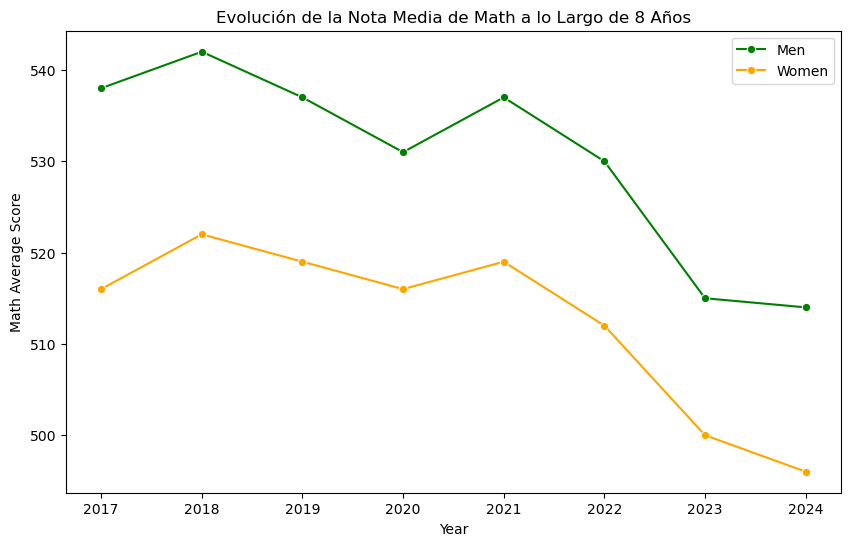

In [256]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_gender, x="Math", y="Men", label = "Men", ci=None, marker="o", color="green")
sns.lineplot(data=df_gender, x="Math", y="Women", label = "Women", ci=None, marker="o", color="orange")
plt.title("Evolución de la Nota Media de Math a lo Largo de 8 Años")
plt.xlabel("Year")
plt.ylabel("Math Average Score")
plt.show()

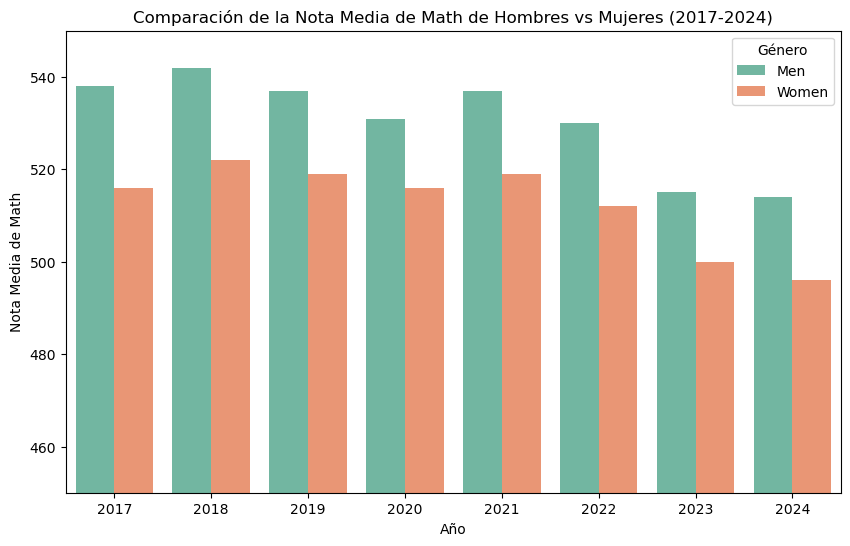

In [257]:
df_melted = df_gender.melt(id_vars=["Math"], value_vars=["Men", "Women"],
                    var_name="Género", value_name="Nota Media")
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Math", y="Nota Media", hue="Género", palette="Set2")
plt.title("Comparación de la Nota Media de Math de Hombres vs Mujeres (2017-2024)")
plt.xlabel("Año")
plt.ylabel("Nota Media de Math")
plt.ylim(450, 550)
plt.show()

### 4. Average ERW Section Score by Gender Over Time, 2017-2024

In [258]:
table4= tables[7]
table4.get_text()
table4

<table class="sonic-table shadow-md"><caption>Average ERW Section Score by Gender Over Time, 2017-2024</caption><thead><tr><th scope="col">ERW</th><th scope="col">Men</th><th scope="col">Women</th><th scope="col">Another or No Response</th></tr></thead><tbody><tr><th data-title="ERW" scope="row"><a href="https://reports.collegeboard.org/media/pdf/2017-total-group-sat-suite-assessments-annual-report.pdf">2017</a></th><td data-title="Men">532</td><td data-title="Women">534</td><td data-title="Another or No Response">N/A</td></tr><tr><th data-title="ERW" scope="row"><a href="https://reports.collegeboard.org/media/pdf/2018-total-group-sat-suite-assessments-annual-report.pdf">2018</a></th><td data-title="Men">534</td><td data-title="Women">539</td><td data-title="Another or No Response">406</td></tr><tr><th data-title="ERW" scope="row"><a href="https://reports.collegeboard.org/media/pdf/2019-total-group-sat-suite-assessments-annual-report.pdf">2019</a></th><td data-title="Men">529</td><td d

In [259]:
headers = [th.text.strip() for th in table4.find_all("th")[:4]]
    # Extraemos las filas de la tabla correctamente
rows = []
for row in table4.find_all("tr")[1:]:  # Ignoramos la primera fila de encabezados
    cols = row.find_all("td")
    # Verificamos si la fila tiene las celdas correspondientes (4 celdas por fila)
    if len(cols) == 3:  # Solo hay 4 celdas de datos por fila (erw + 3 columnas de género)
        year = row.find("th").get_text()  # Obtener el año de la columna <th> de cada fila
        cols = [year] + [ele.get_text() for ele in cols]  # Agregar erw como primera columna
        rows.append(cols)

In [260]:
headers

['ERW', 'Men', 'Women', 'Another or No Response']

In [261]:
rows

[['2017', '532', '534', 'N/A'],
 ['2018', '534', '539', '406'],
 ['2019', '529', '534', '409'],
 ['2020', '523', '532', '499'],
 ['2021', '530', '535', '540'],
 ['2022', '526', '531', '567'],
 ['2023', '517', '523', '552'],
 ['2024', '516', '522', '556']]

In [262]:
df_gender2 = pd.DataFrame(rows, columns = headers)

In [263]:
df_gender2

,ERW,Men,Women,Another or No Response
0,2017,532,534,N/A
1,2018,534,539,406
2,2019,529,534,409
3,2020,523,532,499
4,2021,530,535,540
5,2022,526,531,567
6,2023,517,523,552
7,2024,516,522,556


In [264]:
df_gender2["Men"] = df_gender2.Men.astype(int)
df_gender2["Women"] = df_gender2.Women.astype(int)

/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_12332/1243260274.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_gender2, x="ERW", y="Men", label = "Men", ci=None, marker="o", color="green")
/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_12332/1243260274.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_gender2, x="ERW", y="Women", label = "Women", ci=None, marker="o", color="orange")


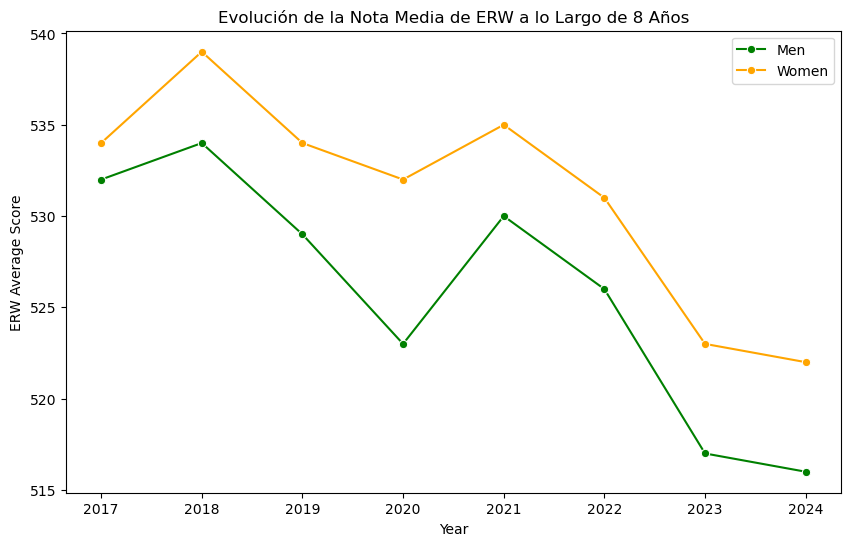

In [265]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_gender2, x="ERW", y="Men", label = "Men", ci=None, marker="o", color="green")
sns.lineplot(data=df_gender2, x="ERW", y="Women", label = "Women", ci=None, marker="o", color="orange")
plt.title("Evolución de la Nota Media de ERW a lo Largo de 8 Años")
plt.xlabel("Year")
plt.ylabel("ERW Average Score")
plt.show()

### 5. Average Total SAT Score by Gender Over Time, 2017-2024

In [266]:
table5 = tables[6]
headers = [th.text.strip() for th in table5.find_all("th")[:4]]
# Extraemos las filas de la tabla correctamente
rows = []
for row in table5.find_all("tr")[1:]:  # Ignoramos la primera fila de encabezados
    cols = row.find_all("td")
    # Verificamos si la fila tiene las celdas correspondientes (4 celdas por fila)
    if len(cols) == 3:  # Solo hay 4 celdas de datos por fila (total + 3 columnas de género)
        year = row.find("th").text.strip()  # Obtener el año de la columna <th> de cada fila
        cols = [year] + [i.text.strip() for i in cols]  # Agregar el género como primera columna
        rows.append(cols)

In [267]:
headers

['Total', 'Men', 'Women', 'Another or No Response']

In [268]:
rows

[['2017', '1070', '1050', 'N/A'],
 ['2018', '1076', '1061', '779'],
 ['2019', '1066', '1053', '802'],
 ['2020', '1055', '1048', '967'],
 ['2021', '1067', '1054', '1041'],
 ['2022', '1056', '1043', '1091'],
 ['2023', '1032', '1023', '1058'],
 ['2024', '1029', '1018', '1067']]

In [269]:
df_totalScore_gender = pd.DataFrame(rows, columns= headers)

In [270]:
df_totalScore_gender

,Total,Men,Women,Another or No Response
0,2017,1070,1050,N/A
1,2018,1076,1061,779
2,2019,1066,1053,802
3,2020,1055,1048,967
4,2021,1067,1054,1041
5,2022,1056,1043,1091
6,2023,1032,1023,1058
7,2024,1029,1018,1067


In [271]:
df_totalScore_gender["Men"] = df_totalScore_gender.Men.astype(int)
df_totalScore_gender["Women"] = df_totalScore_gender.Women.astype(int)


/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_12332/617488907.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_totalScore_gender, x="Total", y="Men", label = "Men", ci=None, marker="o", color="green")
/var/folders/2x/t9dxtxdd28d5d8ddpkgy0y200000gq/T/ipykernel_12332/617488907.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_totalScore_gender, x="Total", y="Women", label = "Women", ci=None, marker="o", color="orange")


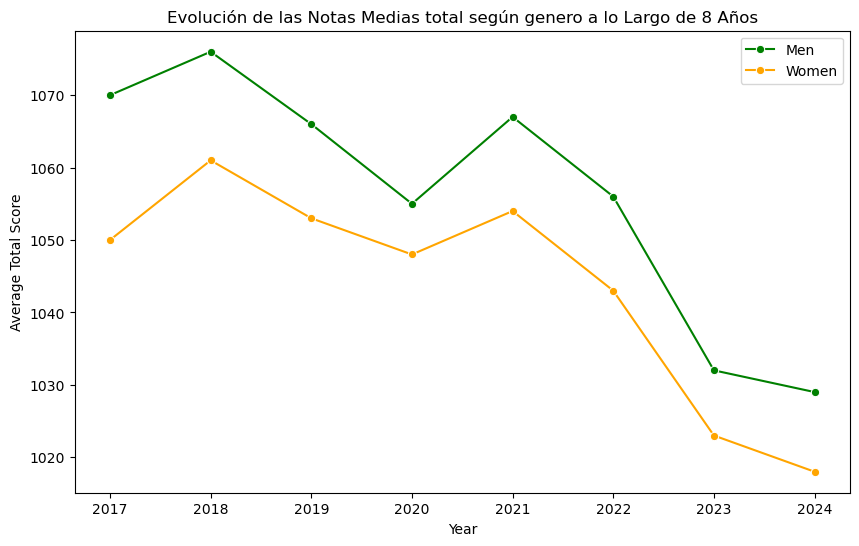

In [272]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_totalScore_gender, x="Total", y="Men", label = "Men", ci=None, marker="o", color="green")
sns.lineplot(data=df_totalScore_gender, x="Total", y="Women", label = "Women", ci=None, marker="o", color="orange")

plt.title("Evolución de las Notas Medias total según genero a lo Largo de 8 Años")
plt.xlabel("Year")
plt.ylabel("Average Total Score")
plt.show()

### 6. Average SAT Score by Highest Level of Parental Education, 2023

In [273]:
table6= tables[10]
table6

<table class="sonic-table shadow-md"><caption>Table: Average SAT Score by Highest Level of Parental Education, 2023</caption><thead><tr><th scope="col">Parent’s Highest Level of Education Achieved</th><th scope="col">Percentage of Test Takers</th><th scope="col">SAT ERW Average Score</th><th scope="col">SAT Math Average Score</th><th scope="col">Total Average SAT Score</th></tr></thead><tbody><tr><th data-title="Parent’s Highest Level of Education Achieved" scope="row">No High School Diploma</th><td data-title="Percentage of Test Takers">6%</td><td data-title="SAT ERW Average Score">457</td><td data-title="SAT Math Average Score">446</td><td data-title="Total Average SAT Score">903</td></tr><tr><th data-title="Parent’s Highest Level of Education Achieved" scope="row">High School Diploma</th><td data-title="Percentage of Test Takers">19%</td><td data-title="SAT ERW Average Score">491</td><td data-title="SAT Math Average Score">470</td><td data-title="Total Average SAT Score">961</td></t

In [274]:
# Extraemos los encabezados de la tabla
headers = [th.text.strip() for th in table6.find_all("th")[:5]]
# Extraemos las filas de la tabla correctamente
rows = []
for row in table6.find_all("tr")[1:]:  # Ignoramos la primera fila de encabezados, me saca la educación
    columns = row.find_all("td")
    # Verificamos si la fila tiene las celdas correspondientes (5 celdas por fila)
    if len(columns) == 4:  # Solo hay 5 celdas de datos por fila ( + 3 columnas de puntajes)
        educ = row.find("th").get_text()  # Obtener el parent educ de la columna <th> de cada fila
        columns = [educ] + [i.get_text() for i in columns]  # Agregar parent educ como primera columna
        rows.append(columns)

In [275]:
table5.find_all("tr")[1:]

[<tr><th data-title="Total" scope="row"><a href="https://reports.collegeboard.org/media/pdf/2017-total-group-sat-suite-assessments-annual-report.pdf">2017</a></th><td data-title="Men">1070</td><td data-title="Women">1050</td><td data-title="Another or No Response">N/A</td></tr>,
 <tr><th data-title="Total" scope="row"><a href="https://reports.collegeboard.org/media/pdf/2018-total-group-sat-suite-assessments-annual-report.pdf">2018</a></th><td data-title="Men">1076</td><td data-title="Women">1061</td><td data-title="Another or No Response">779</td></tr>,
 <tr><th data-title="Total" scope="row"><a href="https://reports.collegeboard.org/media/pdf/2019-total-group-sat-suite-assessments-annual-report.pdf">2019</a></th><td data-title="Men">1066</td><td data-title="Women">1053</td><td data-title="Another or No Response">802</td></tr>,
 <tr><th data-title="Total" scope="row"><a href="https://reports.collegeboard.org/media/pdf/2020-total-group-sat-suite-assessments-annual-report.pdf">2020</a></

In [276]:
table5.find_all("td")

[<td data-title="Men">1070</td>,
 <td data-title="Women">1050</td>,
 <td data-title="Another or No Response">N/A</td>,
 <td data-title="Men">1076</td>,
 <td data-title="Women">1061</td>,
 <td data-title="Another or No Response">779</td>,
 <td data-title="Men">1066</td>,
 <td data-title="Women">1053</td>,
 <td data-title="Another or No Response">802</td>,
 <td data-title="Men">1055</td>,
 <td data-title="Women">1048</td>,
 <td data-title="Another or No Response">967</td>,
 <td data-title="Men">1067</td>,
 <td data-title="Women">1054</td>,
 <td data-title="Another or No Response">1041</td>,
 <td data-title="Men">1056</td>,
 <td data-title="Women">1043</td>,
 <td data-title="Another or No Response">1091</td>,
 <td data-title="Men">1032</td>,
 <td data-title="Women">1023</td>,
 <td data-title="Another or No Response">1058</td>,
 <td data-title="Men">1029</td>,
 <td data-title="Women">1018</td>,
 <td data-title="Another or No Response">1067</td>]

In [277]:
table5.find("th").get_text()

'Total'

In [278]:
headers

['Parent’s Highest Level of Education Achieved',
 'Percentage of Test Takers',
 'SAT ERW Average Score',
 'SAT Math Average Score',
 'Total Average SAT Score']

In [279]:
columns = row.find_all("td")
columns

[<td data-title="Percentage of Test Takers">26%</td>,
 <td data-title="SAT ERW Average Score">457</td>,
 <td data-title="SAT Math Average Score">440</td>,
 <td data-title="Total Average SAT Score">897</td>]

In [280]:
rows

[['No High School Diploma', '6%', '457', '446', '903'],
 ['High School Diploma', '19%', '491', '470', '961'],
 ['Associate Degree', '4%', '512', '488', '1001'],
 ['Bachelor’s Degree', '24%', '560', '548', '1108'],
 ['Graduate Degree', '20%', '597', '589', '1186'],
 ['No Response', '26%', '457', '440', '897']]

In [281]:
df_parenteduc= pd.DataFrame(rows, columns = headers)

In [282]:
df_parenteduc

,Parent’s Highest Level of Education Achieved,Percentage of Test Takers,SAT ERW Average Score,SAT Math Average Score,Total Average SAT Score
0,No High School Diploma,6%,457,446,903
1,High School Diploma,19%,491,470,961
2,Associate Degree,4%,512,488,1001
3,Bachelor’s Degree,24%,560,548,1108
4,Graduate Degree,20%,597,589,1186
5,No Response,26%,457,440,897


In [283]:
# elimino la fila de No Response
df_parenteduc.drop(5, inplace=True, axis=0)

In [284]:
df_parenteduc["SAT ERW Average Score"] = df_parenteduc["SAT ERW Average Score"].astype(int)
df_parenteduc["SAT Math Average Score"] = df_parenteduc["SAT Math Average Score"].astype(int)
df_parenteduc["Total Average SAT Score"] = df_parenteduc["Total Average SAT Score"].astype(int)


In [285]:
ordereduc = df_parenteduc.groupby("Parent’s Highest Level of Education Achieved")['SAT ERW Average Score'].mean().sort_values(ascending=False).index

Text(0.5, 1.0, 'Puntuaciones SAT ERW por nivel educativo de los padres')

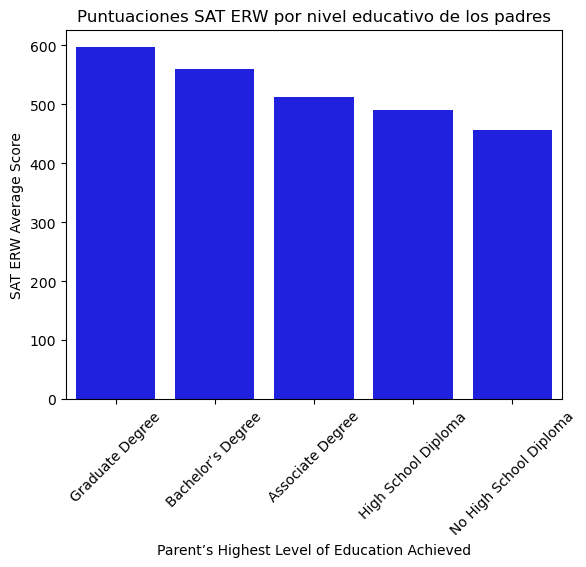

In [286]:
sns.barplot(data= df_parenteduc, x="Parent’s Highest Level of Education Achieved", y="SAT ERW Average Score", order=ordereduc, color= "blue")
plt.xticks(rotation=45)
plt.title("Puntuaciones SAT ERW por nivel educativo de los padres")


Text(0.5, 1.0, 'Puntuaciones SAT Math por nivel educativo de los padres')

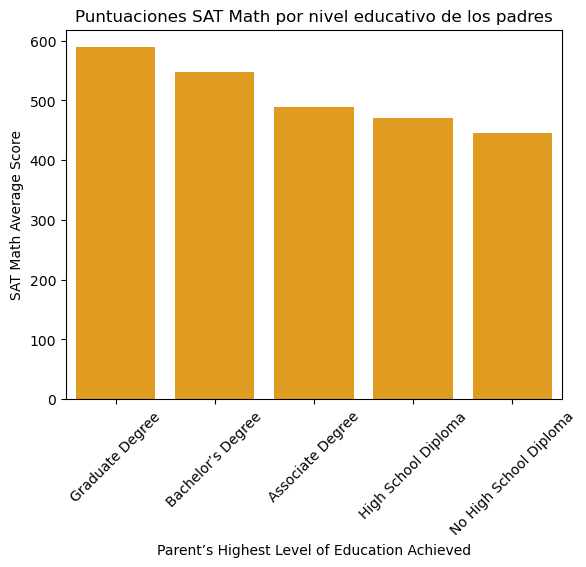

In [287]:
sns.barplot(data= df_parenteduc, x="Parent’s Highest Level of Education Achieved", y="SAT Math Average Score", order= ordereduc, color ="orange")
plt.xticks(rotation=45)
plt.title("Puntuaciones SAT Math por nivel educativo de los padres")


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Graduate Degree'),
  Text(1, 0, 'Bachelor’s Degree'),
  Text(2, 0, 'Associate Degree'),
  Text(3, 0, 'High School Diploma'),
  Text(4, 0, 'No High School Diploma')])

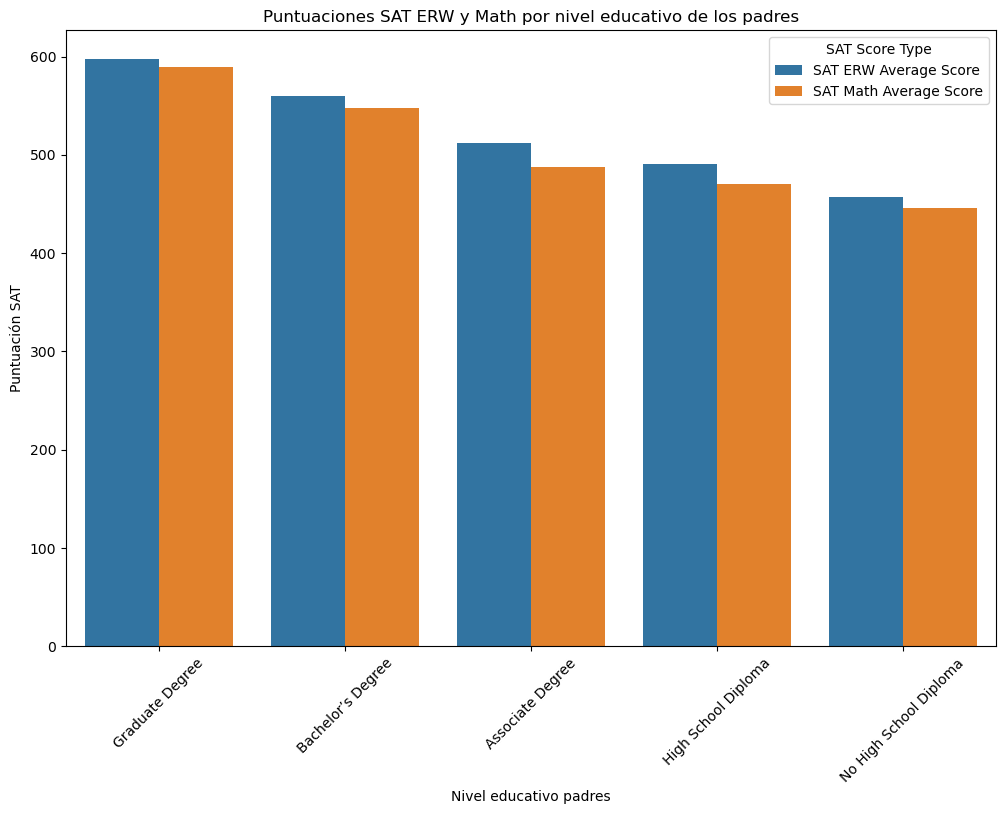

In [288]:
# Reestructuramos el DataFrame para que tenga una columna 'SAT Score Type' (tipo de puntuación)
df_melted = pd.melt(df_parenteduc, id_vars=["Parent’s Highest Level of Education Achieved"], value_vars=["SAT ERW Average Score", "SAT Math Average Score"],
                    var_name="SAT Score Type", value_name="Score")

plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x="Parent’s Highest Level of Education Achieved", y="Score", hue="SAT Score Type", order= ordereduc)
plt.title("Puntuaciones SAT ERW y Math por nivel educativo de los padres")
plt.xlabel("Nivel educativo padres")
plt.ylabel("Puntuación SAT")
plt.xticks(rotation=45)